# Машинное обучение

# Практическое задание по EM-алгоритму

# EM-алгоритм

## Бинарная последовательность

Пусть наблюдается выборка бинарных значений $\mathbb{Y} = (y_1,\ldots, y_l), \; y_i\in\{0,1\}$. Все элементы выборки генерируются независимо, но известно, что в некоторый момент $z$ меняется частота генерации единиц, т.е.: $$\mathbb{P}(y_i = 1) = 
\begin{cases}
\theta_1, \, i &lt; z,\\
\theta_2, \, i \ge z. 
\end{cases}$$
В рамках данной части задания вам необходимо будет реализовать ЕМ-алгоритм для данной модели, где $z$–скрытая переменная, а $\theta_1, \theta_2$ – параметры распределения.
1. (1 балл) Выведите формулы Е- и М-шагов алгоритма для заданной модели. Напомним, что результатом Е-шага является распределение скрытых переменных $q(z)$, М-шага — оценки на параметры распределения.

E-шаг.
$g_z = \mathbb{P}(z~|~Y,\theta) = \frac{\mathbb{P}(Y~|~z,\theta)}{\sum_{i=1}^{l+1}\mathbb{P}(Y~|~i,\theta)}$, где $\mathbb{P}(Y~|~z,\theta) = \prod_{i=1}^{z-1}\theta_1^{y_i}(1-\theta_1)^{1-y_i}\prod_{i=z}^{l}\theta_2^{y_i}(1-\theta_2)^{1-y_i}$

М-шаг.
$\theta_1 = \frac{\sum_{z=1}^{l+1}\sum_{i=1}^{z-1}g_zy_i}{\sum_{z=1}^{l+1}\sum_{i=1}^{z-1}g_z}$

$\theta_2 = \frac{\sum_{z=1}^{l+1}\sum_{i=z}^{l}g_zy_i}{\sum_{z=1}^{l+1}\sum_{i=z}^{l}g_z}$

2) (2 балла) Реализуйте ЕМ-алгоритм для заданной модели в виде функции, параметром которой является наблюдаемая выборка, а возвращаемым значением — векторы с оценками параметров распределений на каждой итерации алгоритма. В качестве критерия останова можете использовать ограничение количества итераций. Формат входных и выходных данных функции остаётся на ваше усмотрение.

Подклячение всех необходимых библиотек.

In [711]:
import numpy as np

In [43]:
from sklearn.manifold import TSNE

In [48]:
import matplotlib.pyplot as plt

In [95]:
from scipy.stats import multivariate_normal

In [222]:
from sklearn.datasets import fetch_mldata

In [242]:
from matplotlib import offsetbox

In [49]:
%matplotlib inline

In [662]:
def bin_EM(Y, teta1, teta2, maxiter): #Функция реализующая EM-алгоритм для заданной модели
    l = Y.shape[0]
    g = np.zeros(l+1)
    Y1 = np.zeros(l)
    Y2 = np.zeros(l)
    G1 = np.zeros(l)
    G2 = np.zeros(l)
    vec = []
    for i in range(l):
        Y1[i] = np.sum(Y[:i+1])
        Y2[i] = np.sum(Y[i:l])
        G1[i] = i+1
        G2[i] = l - i
    for i in range(l+1):
        teta1_vec = np.ones(i, dtype=float) * teta1
        teta2_vec = np.ones(l-i, dtype=float) * teta2
        g[i] = np.prod(teta1_vec**Y[:i]*(1 - teta1_vec)**(1-Y[:i]))*np.prod(teta2_vec**Y[i:]*(1 - teta2_vec)**(1-Y[i:]))
    g /= np.sum(g)
    for it in range(maxiter):
        teta1 = np.sum(g[1:] * Y1) / np.sum(g[1:] * G1)
        teta2 = np.sum(g[:l] * Y2) / np.sum(g[:l] * G2)
        print("iteration:", it+1, "executed")
        for i in range(l+1):
            teta1_vec = np.ones(i, dtype=float) * teta1
            teta2_vec = np.ones(l-i, dtype=float) * teta2
            g[i] = np.prod(teta1_vec**Y[:i]*(1 - teta1_vec)**(1-Y[:i]))*np.prod(teta2_vec**Y[i:]*(1 - teta2_vec)**(1-Y[i:]))
        g /= np.sum(g)
        vec.append((teta1, teta2, g.argmax() + 1))
    return vec

3) (0.5 балла) Проведите эксперимент для $\theta_1 = 0.1$, $\theta_2 = 0.9, z=50, l=100.$ Для этого выполните следующие действия:
сгенерируйте выборку для заданных истинных значений $\theta_1, \theta_2, z, l$;
примените реализованную в п. 2 функцию;
постройте графики зависимостей оценок $\theta_1, \theta_2, z$ от номера итерации ЕМ-алгоритма.

Генерируем выборку

In [712]:
lst = []
for i in range(49):
    t = np.random.randint(low=1, high=10)
    if t == 1:
        lst.append(1)
    else:
        lst.append(0)
for i in range(49,100):
    t = np.random.randint(low=1, high=10)
    if t != 1:
        lst.append(1)
    else:
        lst.append(0)

In [713]:
y = np.array(lst)

In [714]:
print(y)

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]


Запускаем алгоритм для $100$-а итераций

In [715]:
v = bin_EM(y, 0.5, 0.5, 100)

iteration: 1 executed
iteration: 2 executed
iteration: 3 executed
iteration: 4 executed
iteration: 5 executed
iteration: 6 executed
iteration: 7 executed
iteration: 8 executed
iteration: 9 executed
iteration: 10 executed
iteration: 11 executed
iteration: 12 executed
iteration: 13 executed
iteration: 14 executed
iteration: 15 executed
iteration: 16 executed
iteration: 17 executed
iteration: 18 executed
iteration: 19 executed
iteration: 20 executed
iteration: 21 executed
iteration: 22 executed
iteration: 23 executed
iteration: 24 executed
iteration: 25 executed
iteration: 26 executed
iteration: 27 executed
iteration: 28 executed
iteration: 29 executed
iteration: 30 executed
iteration: 31 executed
iteration: 32 executed
iteration: 33 executed
iteration: 34 executed
iteration: 35 executed
iteration: 36 executed
iteration: 37 executed
iteration: 38 executed
iteration: 39 executed
iteration: 40 executed
iteration: 41 executed
iteration: 42 executed
iteration: 43 executed
iteration: 44 execut

Визуализация

In [716]:
t1 = []
t2 = []
z = []
for i in range(100):
    t1.append(v[i][0])
    t2.append(v[i][1])
    z.append(v[i][2])

$\theta_1(iterations)$

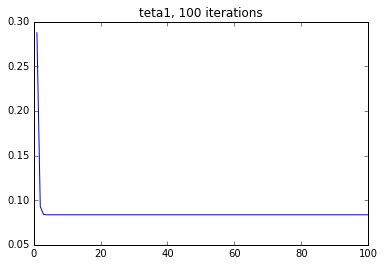

In [717]:
plt.plot(range(1,101), t1)
plt.title('teta1, 100 iterations')

$100$-а итераций оказалось многовато. Сошлось очень быстро, поэтому проведём визуализацию и отдельно для первых $10$-и итераций для наглядности. Аналогично поступим и для других параметров.

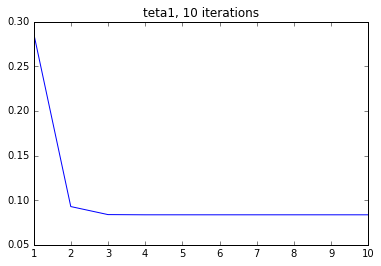

In [718]:
plt.plot(range(1,11), t1[:10])
plt.title('teta1, 10 iterations')

$\theta_2(iterations)$

[0, 101, 0.7, 0.9]

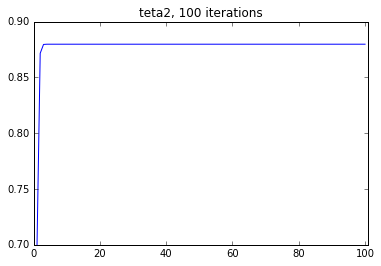

In [719]:
plt.plot(range(1,101), t2)
plt.title('teta2, 100 iterations')
plt.axis([0,101,0.7,0.9])

[1, 10, 0.7, 0.9]

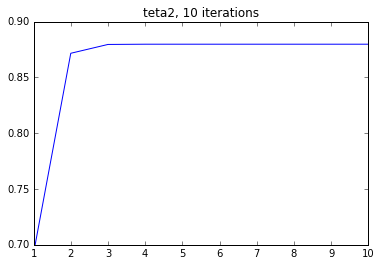

In [720]:
plt.plot(range(1,11), t2[:10])
plt.title('teta2, 10 iterations')
plt.axis([1,10,0.7,0.9])

$z(iterations)$

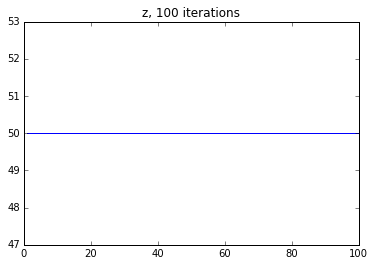

In [721]:
plt.plot(range(1,101), z)
plt.title('z, 100 iterations')

$z$ вообще сразу правильно отыскалось.

Оценки на параметры слегка отличаются от истинных, что связано с небольшим размером выборки и, следовательно, реальная доля единиц в первой и во второй частях выборки может отличаться от $0.1$ и $0.9$.

In [724]:
d1 = (y[:49] == 1).sum() / 49
d2 = (y[49:] == 1).sum() / 51
print("Доля в первой части:", d1, "Первый параметр:", t1[99], "Доля во второй части:", d2, "Второй параметр:", t2[99])

Доля в первой части: 0.0816326530612 Первый параметр: 0.0835968533292 Доля во второй части: 0.882352941176 Второй параметр: 0.879746771141


Как нетрудно заметить: наши оценки параметров близки к реальным долям, а не к планируемым.

4) (0.5 балла) Какой функционал оптимизирует ЕМ-алгоритм? Постройте график зависимости этого функционала от номера итерации ЕМ-алгоритма. Ведёт ли эта величина себя монотонно?

Вообще говоря вот такой: $L(\theta) = ln(\mathbb{P}(Y~|~\theta)) = ln(\sum_{z=1}^{l+1}\mathbb{P}(Y,z~|~\theta))$

Но, благодаря выбору $q(z) = \mathbb{P}(z~|Y,\theta)$, этот функционал может быть представлен в виде:

$Q(\theta^{old},\theta^{new}) = \sum_{z=1}^{l+1}g_z(\sum_{j=1}^{z-1}(y_jln\theta_1+(1-y_j)ln(1-\theta_1)) + \sum_{j=z}^{l}(y_jln\theta_2+(1-y_j)ln(1-\theta_2)) - ln(l+1)))$

In [729]:
Q = []
py = np.zeros(101, dtype=float)
g = np.zeros(101, dtype=float)
for it in range(100):    
    for i in range(101):
        teta1_vec = np.ones(i, dtype=float) * t1[it]
        teta2_vec = np.ones(100-i, dtype=float) * t2[it]
        py[i] = np.prod(teta1_vec**y[:i]*(1 - teta1_vec)**(1-y[:i]))*np.prod(teta2_vec**y[i:]*(1 - teta2_vec)**(1-y[i:]))
    g = py / np.sum(py)
    Q.append(np.sum(g * (np.log(py) - np.log(101))))

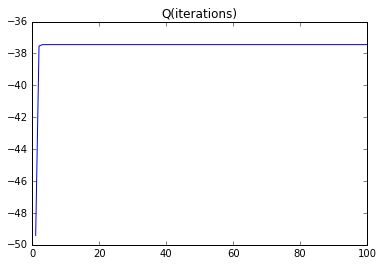

In [732]:
plt.plot(range(1,101), Q)
plt.title("Q(iterations)")

Функционал сошёлся за три итерации, и на них он себя вёл монотонно.

5) (0.5 балла) Повторите эксперимент аналогично п.3 1000 раз для $\theta_1 = 0.49$, $\theta_2 = 0.51, z=500, l=550$. Оцените RMSE для между истинным значением и оценками, полученными в результате экспериментов, для $\theta_1, \theta_2, z$, а также постройте гистограмму полученных в результате экспериментов остатков для этих величин.

Генерируем выборку и запускаем эксперименты.

In [701]:
mse1 = []
mse2 = []
mse3 = []
for i in range(1000):
    r1 = np.random.random_sample((500,))
    y1 = np.zeros(500, dtype=int)
    r2 = np.random.random_sample((50,))
    y2 = np.zeros(50, dtype=int)
    y1[r1 <= 0.49] = 1
    y2[r2 <= 0.51] = 1
    y = np.array(list(y1) + list(y2))
    print("Experiment №",i+1)
    v = bin_EM(y, 0.5, 0.5, 10)
    mse1.append(v[9][0])
    mse2.append(v[9][1])
    mse3.append(v[9][2])

Experiment № 1
iteration: 1 executed
iteration: 2 executed
iteration: 3 executed
iteration: 4 executed
iteration: 5 executed
iteration: 6 executed
iteration: 7 executed
iteration: 8 executed
iteration: 9 executed
iteration: 10 executed
Experiment № 2
iteration: 1 executed
iteration: 2 executed
iteration: 3 executed
iteration: 4 executed
iteration: 5 executed
iteration: 6 executed
iteration: 7 executed
iteration: 8 executed
iteration: 9 executed
iteration: 10 executed
Experiment № 3
iteration: 1 executed
iteration: 2 executed
iteration: 3 executed
iteration: 4 executed
iteration: 5 executed
iteration: 6 executed
iteration: 7 executed
iteration: 8 executed
iteration: 9 executed
iteration: 10 executed
Experiment № 4
iteration: 1 executed
iteration: 2 executed
iteration: 3 executed
iteration: 4 executed
iteration: 5 executed
iteration: 6 executed
iteration: 7 executed
iteration: 8 executed
iteration: 9 executed
iteration: 10 executed
Experiment № 5
iteration: 1 executed
iteration: 2 execut

RMSE для $\theta_1$

In [735]:
mse = np.array(mse1)

In [738]:
print("RMSE:",(np.sum((mse - 0.49)**2)/1000) ** 0.5)

RMSE: 0.0343356438344


RMSE для $\theta_2$

In [739]:
mse = np.array(mse2)
print("RMSE:", (np.sum((mse - 0.51)**2)/1000) ** 0.5)

RMSE: 0.0382944125723


RMSE для z

In [740]:
mse = np.array(mse3)
print("RMSE:",(np.sum((mse - 500)**2)/1000) ** 0.5)

RMSE: 252.585870547


Гистограмма остатков для z

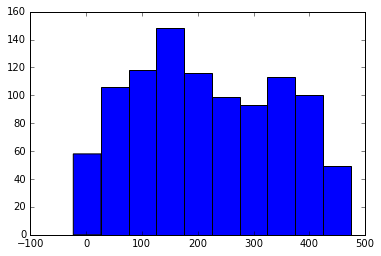

In [710]:
a = plt.hist(500 - mse)

Из-за маленьких различий между $\theta_1$ и $\theta_2$, z не всегда находится правильно.

# Смесь нормальных распределений

Пусть данные описываются смесью многомерных нормальных распределений: $$p(x_i|\Theta) = \sum_{k=1}^K \pi_k p(x_i|\theta_k) = \sum_{k=1}^K \pi_k \mathcal{N}(x_i|\mu_k, \Sigma_k).$$
В рамках данной части задания вам необходимо реализовать ЕМ-алгоритм для нахождения параметров указанного распределения (формулы для данной модели были выведены в материалах семинара 15) и применить его для решения задачи классификации на датасете MNIST. Чтобы применение ЕМ-алгоритма к датасету MNIST было осмысленным, мы воспользуемся методом понижения размерности t-SNE.
7) (2 балла) Реализуйте ЕМ-алгоритм для заданной модели в виде функции, параметром которой является наблюдаемая выборка, а возвращаемым значением — итоговые оценки параметров распределения и значения скрытых переменных. В качестве критерия останова можете использовать ограничение количества итераций. Формат входных и выходных данных функции остаётся на ваше усмотрение.

In [388]:
def mix_EM(X, K, pi, mu, sig, maxiter): #EM для смеси
    G = np.zeros((X.shape[0], K))
    l = X.shape[0]
    for it in range(maxiter):
        for i in range(G.shape[0]):
            a = 0
            for j in range(K):
                 a += pi[j]*multivariate_normal.pdf(X[i], mu[j], sig[j], allow_singular=True)
            for k in range(G.shape[1]):
                G[i, k] = pi[k]*multivariate_normal.pdf(X[i], mu[k], sig[k], allow_singular=True)
                G[i, k] /= a
        pi = (1/l) * np.sum(G, axis=0)
        for i in range(K):
            mu[i] = np.sum(G[:, i].reshape(l, 1) * X, axis=0) / (l * pi[i])
        for i in range(K):
            sig[i] = (1/(l*pi[i])) * ((X - mu[i]).T*G[:,i] @ (X - mu[i]))
        print("iteration: ", it+1, "executed")
    for i in range(G.shape[0]):
        a = 0
        for j in range(K):
            a += pi[j]*multivariate_normal.pdf(X[i], mu[j], sig[j], allow_singular=True)
        for k in range(G.shape[1]):
            G[i, k] = pi[k]*multivariate_normal.pdf(X[i], mu[k], sig[k], allow_singular=True)
            G[i, k] /= a
    Z = G.argmax(axis=1)
    return (pi, mu, sig, Z)

8) (1 балл) Загрузите признаковые описания и значения целевой переменной для 2000 случайных объектов из обучающей выборки датасета MNIST и сохраните их в соответствующие переменные.

In [224]:
mnist = fetch_mldata('MNIST original')

In [230]:
data = mnist.data
target = mnist.target
data_for_shuffle = np.hstack((data, target.reshape(70000, 1)))

In [231]:
np.random.shuffle(data_for_shuffle)

In [234]:
data = data_for_shuffle[:2000, :784]
target = data_for_shuffle[:2000, 784]

9) (0.5 балла) Визуализируйте полученную выборку на плоскости при помощи t-SNE, используя различные цвета для объектов различных классов.

In [238]:
t = TSNE()

In [241]:
bin_data = t.fit_transform(data)

In [263]:
def plot_embedding(X, title=None): #Использовался пример из sklearn
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(target[i]),
                 color=plt.cm.Set1(target[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                continue
            shown_images = np.r_[shown_images, [X[i]]]
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

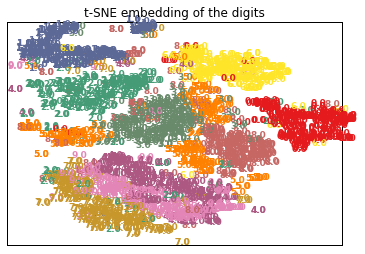

In [264]:
plot_embedding(bin_data, "t-SNE embedding of the digits")

Для выборки из п. 8 понизьте количество признаков до 3 при помощи t-SNE, потом разбейте ее на 2 части в соотношении 7:3 и обучите параметры смеси на бОльшей части с помощью ЕМ алгоритма для $K=10$ компонент.

Понижаем размерность и разбиваем на train и test.

In [265]:
t = TSNE(n_components=3)

In [266]:
tr_data = t.fit_transform(data)

In [267]:
tr_data.shape

(2000, 3)

In [285]:
train_data = tr_data[:1400]
test_data = tr_data[1400:]
train_target = target[:1400]
test_target = target[1400:]

Генерим нормальное распределение и задаём случайные параметры $\mu$ и $\sigma$.

In [741]:
K = 10
maxiter = 100
pi_0 = np.random.randn(10)
pi_0[pi_0 < 0] *= -1
pi_0 /= np.sum(pi_0)
mu_0 = np.random.randn(K, 3)
sig_0 = []
for i in range(K):
    s = np.random.randn(3,3)
    sig_0.append(s @ s.T)
sig_0 = np.array(sig_0)

Запускаем алгоритм на 100 итераций.

In [742]:
pi, mu, sig, Z = mix_EM(train_data, K, pi_0, mu_0, sig_0, maxiter)

iteration:  1 executed
iteration:  2 executed
iteration:  3 executed
iteration:  4 executed
iteration:  5 executed
iteration:  6 executed
iteration:  7 executed
iteration:  8 executed
iteration:  9 executed
iteration:  10 executed
iteration:  11 executed
iteration:  12 executed
iteration:  13 executed
iteration:  14 executed
iteration:  15 executed
iteration:  16 executed
iteration:  17 executed
iteration:  18 executed
iteration:  19 executed
iteration:  20 executed
iteration:  21 executed
iteration:  22 executed
iteration:  23 executed
iteration:  24 executed
iteration:  25 executed
iteration:  26 executed
iteration:  27 executed
iteration:  28 executed
iteration:  29 executed
iteration:  30 executed
iteration:  31 executed
iteration:  32 executed
iteration:  33 executed
iteration:  34 executed
iteration:  35 executed
iteration:  36 executed
iteration:  37 executed
iteration:  38 executed
iteration:  39 executed
iteration:  40 executed
iteration:  41 executed
iteration:  42 executed
i

Полученное разделение выборки на компоненты можно использовать для построения классификатора, предсказывающего изображенную цифру. Для этого будем считать прогнозом для всех объектов $k$-ой компоненты самую частую истинную метку среди объектов этой компоненты:
$$a(x_i) = \arg \max_{k \in \{1, \dots, K\}} \sum_{j=1}^l [z_j = z_i] [y_j = k],$$
где $z_i$ — вектор скрытых переменных для объекта выборки $x_i$.

11) (0.5 балла) Выведите значение accuracy на обучающей и тестовой выборке для описанного выше способа построения прогнозов на объектах и истинной разметки выборки.

In [743]:
lst = []
for k in range(K):
    lst1 = []
    for dig in range(10):
        lst1.append((train_target[Z==k]==dig).sum())
    lst1 = np.array(lst1)
    lst.append(lst1.argmax())

In [744]:
lst = np.array(lst)

In [745]:
lst

array([0, 0, 8, 3, 7, 1, 6, 4, 3, 1])

Посчитаем accuracy для train

In [747]:
acc = 0
for i in range(1400):
    if (lst[Z[i]] == target[i]):
        acc += 1
print("Accuracy:", acc/1400)

Accuracy: 0.5307142857142857


Теперь для test

In [748]:
G = np.zeros((test_data.shape[0], K), dtype=float)
for i in range(G.shape[0]):
    a = 0
    for j in range(K):
        a += pi[j]*multivariate_normal.pdf(test_data[i], mu[j], sig[j], allow_singular=True)
    for k in range(G.shape[1]):
        G[i, k] = pi[k]*multivariate_normal.pdf(test_data[i], mu[k], sig[k], allow_singular=True)
        G[i, k] /= a
test_Z = G.argmax(axis=1)

In [749]:
print("Accuracy:", (lst[test_Z] == test_target).sum()/600)

Accuracy: 0.52


Ну в принципе больше 50%, что, не так уж и плохо. В пять раз лучше случайного классификатора.

12) (1 балл) Постройте график зависимости значения accuracy на обучающей и тестовой выборке для описанного выше способа построения прогнозов на объектах и истинной разметки выборки от числа компонент $K$, фигурирующего в ЕМ-алгоритме. Не забудьте попробовать число компонент $K \geq; 10$ (при этом аргмаксимум, конечно, нужно брать по $k \in \{1, \dots, 10\}$).

Проведём эксперименты для числа компонент $3,5,7,10,12,15,17,20,25,30$

In [465]:
acc = []
for K in [3,5,7,10,12,15,17,20,22,25,30]:
    maxiter = 100
    pi_0 = np.random.randn(K)
    pi_0[pi_0 < 0] *= -1
    pi_0 /= np.sum(pi_0)
    mu_0 = np.random.randn(K, 3)
    sig_0 = []
    for i in range(K):
        s = np.random.randn(3,3)
        sig_0.append(s @ s.T)
    sig_0 = np.array(sig_0)
    print("Number of components:", K)
    pi, mu, sig, Z = mix_EM(train_data, K, pi_0, mu_0, sig_0, maxiter)
    lst = []
    for k in range(K):
        lst1 = []
        for dig in range(10):
            lst1.append((train_target[Z==k]==dig).sum())
        lst1 = np.array(lst1)
        lst.append(lst1.argmax())
    G = np.zeros((test_data.shape[0], K), dtype=float)
    for i in range(G.shape[0]):
        a = 0
        for j in range(K):
            a += pi[j]*multivariate_normal.pdf(test_data[i], mu[j], sig[j], allow_singular=True)
        for k in range(G.shape[1]):
            G[i, k] = pi[k]*multivariate_normal.pdf(test_data[i], mu[k], sig[k], allow_singular=True)
            G[i, k] /= a
    test_Z = G.argmax(axis=1)
    lst = np.array(lst)
    acc.append((lst[test_Z] == test_target).sum()/600)

Number of components: 3
iteration:  1 executed
iteration:  2 executed
iteration:  3 executed
iteration:  4 executed
iteration:  5 executed
iteration:  6 executed
iteration:  7 executed
iteration:  8 executed
iteration:  9 executed
iteration:  10 executed
iteration:  11 executed
iteration:  12 executed
iteration:  13 executed
iteration:  14 executed
iteration:  15 executed
iteration:  16 executed
iteration:  17 executed
iteration:  18 executed
iteration:  19 executed
iteration:  20 executed
iteration:  21 executed
iteration:  22 executed
iteration:  23 executed
iteration:  24 executed
iteration:  25 executed
iteration:  26 executed
iteration:  27 executed
iteration:  28 executed
iteration:  29 executed
iteration:  30 executed
iteration:  31 executed
iteration:  32 executed
iteration:  33 executed
iteration:  34 executed
iteration:  35 executed
iteration:  36 executed
iteration:  37 executed
iteration:  38 executed
iteration:  39 executed
iteration:  40 executed
iteration:  41 executed
i

Визуализируем accuracy

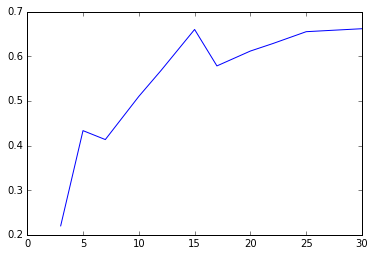

In [470]:
plt.plot([3,5,7,10,12,15,17,20,22,25,30], acc)

Как видим на 15 компонентах был случайный всплеск, а так точность монотонно возрастает где-то до 66-67% и выше вряд ли поднимется. На всякий случай проведем ещё один эксперимент для $35, 40$ компонент.

In [471]:
for K in [35,40]:
    maxiter = 100
    pi_0 = np.random.randn(K)
    pi_0[pi_0 < 0] *= -1
    pi_0 /= np.sum(pi_0)
    mu_0 = np.random.randn(K, 3)
    sig_0 = []
    for i in range(K):
        s = np.random.randn(3,3)
        sig_0.append(s @ s.T)
    sig_0 = np.array(sig_0)
    print("Number of components:", K)
    pi, mu, sig, Z = mix_EM(train_data, K, pi_0, mu_0, sig_0, maxiter)
    lst = []
    for k in range(K):
        lst1 = []
        for dig in range(10):
            lst1.append((train_target[Z==k]==dig).sum())
        lst1 = np.array(lst1)
        lst.append(lst1.argmax())
    G = np.zeros((test_data.shape[0], K), dtype=float)
    for i in range(G.shape[0]):
        a = 0
        for j in range(K):
            a += pi[j]*multivariate_normal.pdf(test_data[i], mu[j], sig[j], allow_singular=True)
        for k in range(G.shape[1]):
            G[i, k] = pi[k]*multivariate_normal.pdf(test_data[i], mu[k], sig[k], allow_singular=True)
            G[i, k] /= a
    test_Z = G.argmax(axis=1)
    lst = np.array(lst)
    acc.append((lst[test_Z] == test_target).sum()/600)

Number of components: 35
iteration:  1 executed
iteration:  2 executed
iteration:  3 executed
iteration:  4 executed
iteration:  5 executed
iteration:  6 executed
iteration:  7 executed
iteration:  8 executed
iteration:  9 executed
iteration:  10 executed
iteration:  11 executed
iteration:  12 executed
iteration:  13 executed
iteration:  14 executed
iteration:  15 executed
iteration:  16 executed
iteration:  17 executed
iteration:  18 executed
iteration:  19 executed
iteration:  20 executed
iteration:  21 executed
iteration:  22 executed
iteration:  23 executed
iteration:  24 executed
iteration:  25 executed
iteration:  26 executed
iteration:  27 executed
iteration:  28 executed
iteration:  29 executed
iteration:  30 executed
iteration:  31 executed
iteration:  32 executed
iteration:  33 executed
iteration:  34 executed
iteration:  35 executed
iteration:  36 executed
iteration:  37 executed
iteration:  38 executed
iteration:  39 executed
iteration:  40 executed
iteration:  41 executed


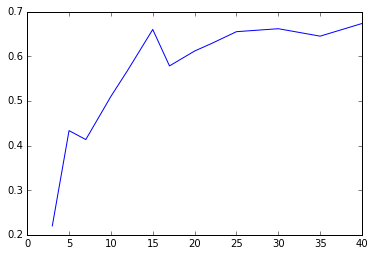

In [473]:
plt.plot([3,5,7,10,12,15,17,20,22,25,30,35,40], acc)

Похоже на правду.

Вставьте одну из ваших любимых цитат преподавателей

На первом курсе, математический анализ у нас вёл Федотов Михаил Валентинович. И когда кто-то жёстко тупил у доски, он произносил: "А не хотите ли подать заявление?". На моей памяти он произнёс эту фразу раз пять или шесть.

Ну и фразочка Орлова: "Усохни моя душенька" -- надолго застряла в памяти.